# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{10} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* aaa
  * aaa
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 
df_chl_out_8DOC_3 = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_8DOC_modisa_3.csv', \
                              index_col='index')
df_chl_out_8DOC_3

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN,520.4050
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784,822.7430
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250,584.0640
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141,545.1970
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664,858.3870
4149,15707,2002-11-09,23.783812,-15.661781,0.000150,67.022625,12.926656,0.000075,-12.393500,1000.000000,NaN,0.153961,-0.812589,-0.004697,NaN,580.7750
4167,34710,2002-11-09,26.598219,25.294281,0.000126,63.000156,17.952812,0.000065,-2.723375,0.001878,28.255188,0.501054,-0.300115,0.112797,-0.947702,513.0270
4173,34721,2002-11-09,18.274406,12.886094,0.000124,68.182750,12.879281,0.000063,8.236687,0.001813,29.291313,0.150119,-0.823564,0.002713,-2.566549,457.1560
4426,34710,2002-11-17,51.033437,42.687531,0.000152,62.227781,20.239094,0.000075,-25.647250,0.001815,27.549469,0.480306,-0.318482,-0.020748,NaN,327.3360


In [3]:
check1 = df_chl_out_8DOC_3.chl_rate/ df_chl_out_8DOC_3.chlor_a 
check2 = df_chl_out_8DOC_3.chl_rate.divide(df_chl_out_8DOC_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_8DOC_3['chlor_a_log10_rate'] = pd.Series(np.array(check2), index=df_chl_out_8DOC_3.index)
df_chl_out_8DOC_3.head()

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.000000,NaN,0.132783,-0.876858,-0.017698,NaN,520.405,-0.133285
3888,11089,2002-11-01,13.679406,4.337844,0.000106,65.099156,14.269219,0.000057,-11.122000,0.003679,28.969813,0.150789,-0.821630,0.025481,-1.593784,822.743,0.168984
3908,34710,2002-11-01,12.432687,11.684344,0.000123,63.145031,17.038563,0.000064,0.757312,0.001698,28.970219,0.388257,-0.410881,0.064084,-1.193250,584.064,0.165056
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.000000,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197,0.017070
4147,11089,2002-11-09,19.677781,-6.951906,0.000126,64.193281,14.220969,0.000065,-17.539250,0.003868,28.742188,0.201879,-0.694909,0.051090,-1.291664,858.387,0.253072


In [5]:
df_chl_out_8DOC_3.chlor_a_log10_rate.describe()  # more scattered on the left hand side

count    683.000000
mean      -0.260396
std        1.329039
min      -15.773732
25%       -0.268052
50%       -0.041465
75%        0.174284
max        0.963227
Name: chlor_a_log10_rate, dtype: float64

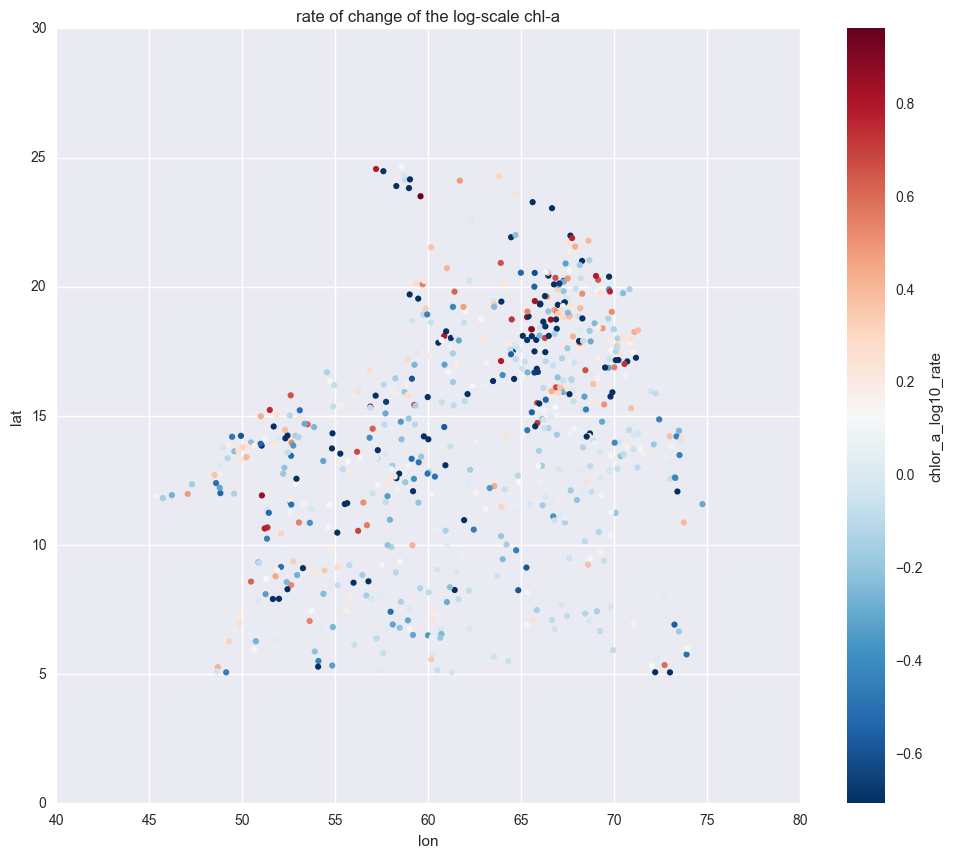

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_8DOC_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_log10_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

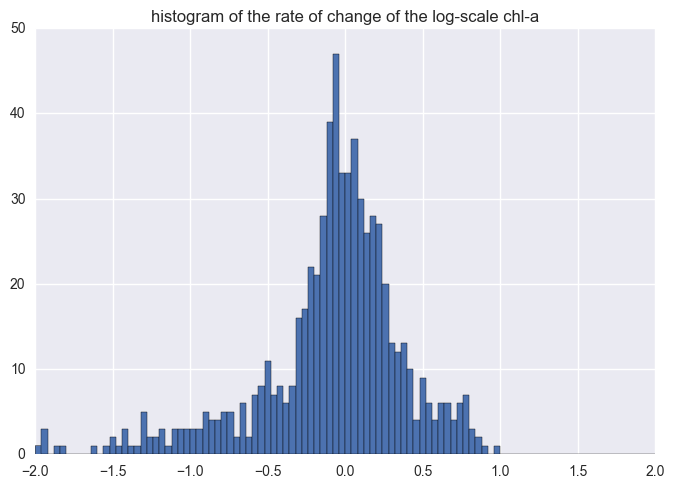

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_8DOC_3.chlor_a_log10_rate.dropna().hist(bins=100,range=[-2,2]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

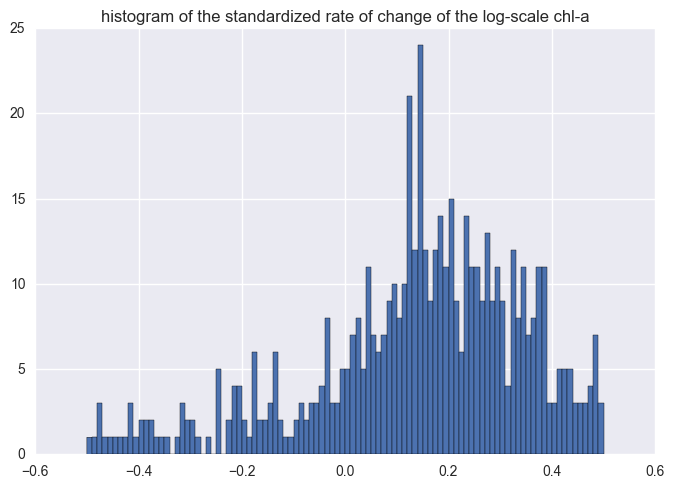

In [8]:
# standarized series
tmp = df_chl_out_8DOC_3.chlor_a_log10_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-0.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [9]:
# id:11089, time:2002-11-07"
# (0.194167 - 0.182671) / 0.194167    == 0.059207
df_chl_out_8DOC_3.sort_values(by=['id', 'time']).head()

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.0,NaN,0.132783,-0.876858,-0.017698,NaN,520.405,-0.133285
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.0,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197,0.017070
5440,10206,2002-12-19,9.617437,4.556469,0.004192,64.896875,12.434812,0.001140,-8.368125,1000.0,NaN,0.156649,-0.805072,0.019815,-1.703006,795.611,0.126493
5699,10206,2002-12-27,12.251438,-1.765500,0.001212,64.271031,12.549094,0.000417,-11.493313,1000.0,NaN,0.163432,-0.786663,0.006783,-2.168578,866.410,0.041504
5958,10206,2003-01-04,12.856875,-5.715375,0.002190,63.550156,12.280437,0.000691,-11.053437,1000.0,NaN,0.293834,-0.531898,0.130402,-0.884716,940.296,0.443795


In [10]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_8DOC_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_8DOC_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
df_chl_out_8DOC_3.to_csv('df_chl_out_8DOC_modisa_4.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_8DOC_modisa_4.csv', index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

,id,time,spd,vn,var_lon,lon,lat,var_lat,ve,var_tmp,temp,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,11.188906,6.509875,0.000996,67.351188,10.873656,0.000352,-6.823625,1000.0,NaN,0.132783,-0.876858,-0.017698,NaN,520.405,-0.133285
4145,10206,2002-11-09,3.428062,1.562844,0.003551,67.108219,11.155719,0.000984,-0.786375,1000.0,NaN,0.135089,-0.869380,0.002306,-2.637141,545.197,0.017070
5440,10206,2002-12-19,9.617437,4.556469,0.004192,64.896875,12.434812,0.001140,-8.368125,1000.0,NaN,0.156649,-0.805072,0.019815,-1.703006,795.611,0.126493
5699,10206,2002-12-27,12.251438,-1.765500,0.001212,64.271031,12.549094,0.000417,-11.493313,1000.0,NaN,0.163432,-0.786663,0.006783,-2.168578,866.410,0.041504
5958,10206,2003-01-04,12.856875,-5.715375,0.002190,63.550156,12.280437,0.000691,-11.053437,1000.0,NaN,0.293834,-0.531898,0.130402,-0.884716,940.296,0.443795


In [11]:
print("test")

test
